# Distributions of various calibrated FUSE parameters and metrics 
Four FUSE instances. 

# Purpose

Perturbation bounds for DELSA

In [1]:
import glob, os
import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

import warnings
warnings.filterwarnings("ignore")

In [2]:
outdir = '/glade/work/manab/ff/islandpark/output/allens2'  # Where the 100 ens * 4 model runs are stored

prmsparam = sorted(glob.glob(outdir + '/*_111_para_best.nc'))
hechmsparam = sorted(glob.glob(outdir + '/*_222_para_best.nc'))
vicparam = sorted(glob.glob(outdir + '/*_333_para_best.nc'))
sacsmaparam = sorted(glob.glob(outdir + '/*_444_para_best.nc'))

# List of all netCDF variables and long_names

In [3]:
parlist = list(xr.open_dataset(prmsparam[0])) #Get a list of all netCDF variables

prmsparlist = ['RFERR_MLT', 'FRACTEN', 'MAXWATR_1', 'MAXWATR_2', 'QB_PRMS', 'RTFRAC1', 
            'PERCRTE', 'PERCEXP', 'IFLWRTE', 'SAREAMAX', 'TIMEDELAY', 'MBASE', 'MFMAX', 
            'MFMIN', 'PXTEMP', 'OPG', 'LAPSE'] #Comes from FUSE model run logs
hechmsparlist = ['RFERR_MLT', 'FRACTEN', 'MAXWATR_1', 'MAXWATR_2', 'QB_PRMS', 'PERCRTE', 'PERCEXP', 
                 'AXV_BEXP', 'TIMEDELAY', 'MBASE', 'MFMAX', 'MFMIN', 'PXTEMP', 'OPG', 'LAPSE']
vicparlist = ['RFERR_MLT', 'FRACTEN', 'MAXWATR_1', 'MAXWATR_2', 'BASERTE', 'QB_POWR', 'RTFRAC1', 'PERCRTE', 
              'PERCEXP', 'AXV_BEXP', 'TIMEDELAY', 'MBASE', 'MFMAX', 'MFMIN', 'PXTEMP', 'OPG', 'LAPSE']
sacsmaparlist = ['RFERR_MLT', 'FRACTEN', 'MAXWATR_1', 'PERCFRAC', 'FPRIMQB', 'MAXWATR_2', 'QBRATE_2A',
                 'QBRATE_2B', 'SACPMLT', 'SACPEXP', 'IFLWRTE', 'SAREAMAX', 'TIMEDELAY', 'MBASE', 'MFMAX',
                 'MFMIN', 'PXTEMP', 'OPG', 'LAPSE']

In [11]:
def descExtract(ncdf):
    '''Extracts netCDF variable descriptions 
    
    ncdf: Example netCDF file output from FUSE
    '''
    nctemp = xr.open_dataset(ncdf) #Get a list of all netCDF variables
    pardesclist = []
    for var in nctemp.variables.values():
        
        pardesc = var.attrs.get('long_name')
        pardesclist.append(pardesc)
    return(pardesclist)
    
pardesclist = descExtract(ncdf = prmsparam[0])

In [5]:
def parExtract(nclist, parlist):
    '''Extracts a variable from a list of netCDF files
    
    nclist: List of netCDF files
    ncpar: Variable which you want to extract values
    '''
    #ncdat = []
    ncdat = pd.DataFrame([])
    for count, value in enumerate(nclist):
        ncout = xr.open_dataset(value).to_dataframe()
        parval = ncout[parlist]
        ncdat = ncdat.append(parval)
        #
    return(ncdat)

# FUSE (PRMS)

        RFERR_MLT     FRACTEN   MAXWATR_1    MAXWATR_2     QB_PRMS  \
count  100.000000  100.000000  100.000000   100.000000  100.000000   
mean     1.000381    0.604422  428.354462  2817.060547    0.039997   
std      0.000303    0.316725   89.610764  1417.929565    0.064581   
min      1.000002    0.055848   59.959824    54.968994    0.001257   
25%      1.000093    0.297477  388.013657  1591.700836    0.002544   
50%      1.000373    0.649817  468.617920  3021.094727    0.005600   
75%      1.000628    0.941363  496.938263  4004.786316    0.053018   
max      1.000987    0.949986  499.889343  4989.442871    0.247009   

          RTFRAC1     PERCRTE     PERCEXP     IFLWRTE    SAREAMAX   TIMEDELAY  \
count  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
mean     0.800095  504.057068    7.110446   24.294785    0.204056    3.947959   
std      0.185447  286.622101    6.371850   48.373890    0.235461    1.053603   
min      0.182720    0.123681    1.000523    

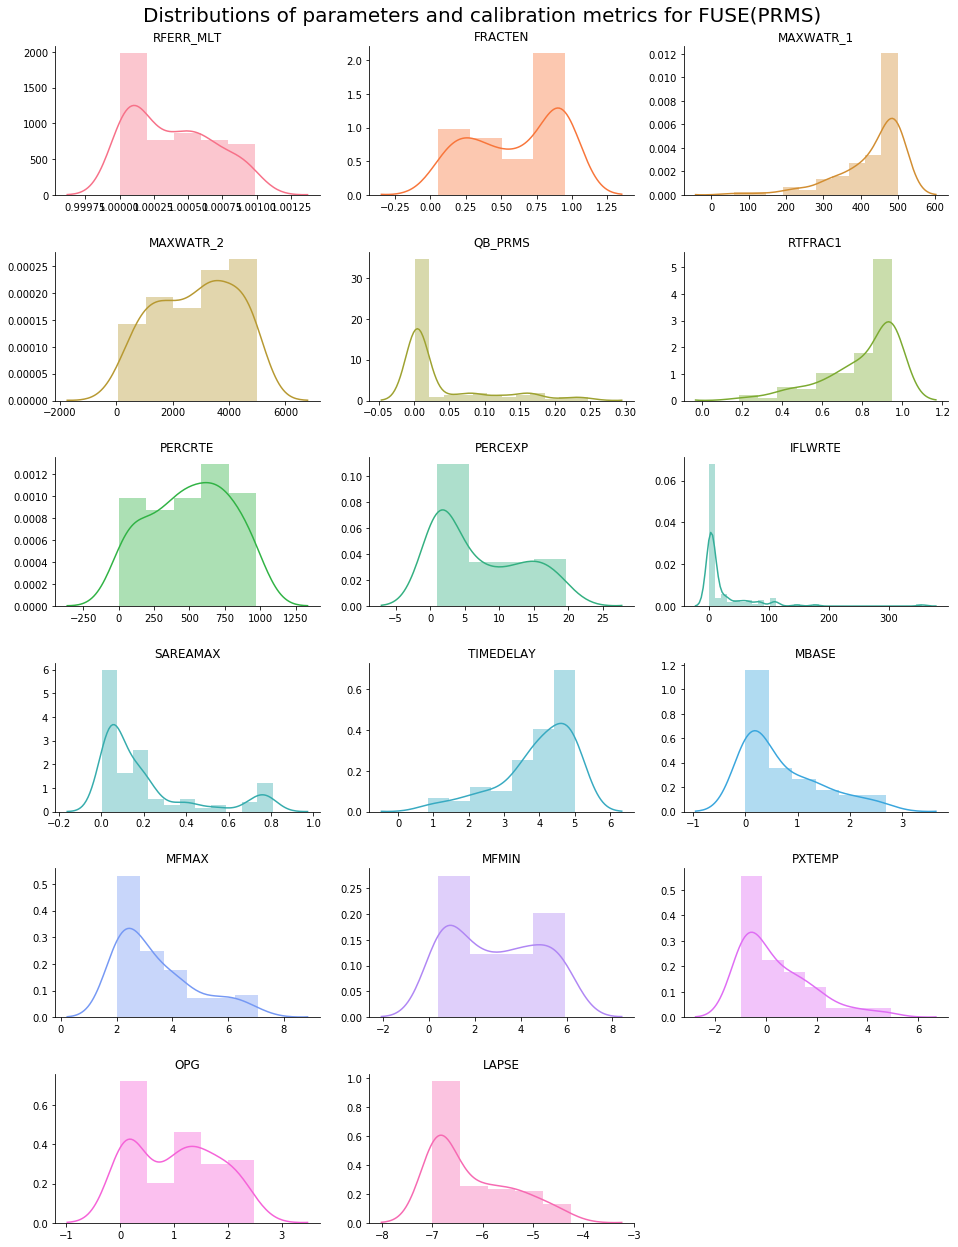

In [6]:
pardat = parExtract(prmsparam, prmsparlist) 
parstat= pardat.describe() #Descriptive statistics
parstat.to_csv('output/prmsstats_trunc.csv') 

pardat = pd.melt(pardat)  #tidy
print(parstat)

#Plot
g = sns.FacetGrid(pardat, col="variable", col_order=prmsparlist, hue='variable', col_wrap=3, sharey = False, sharex=False)
g = (g.map(sns.distplot, 'value').set_ylabels('').set_xlabels(''))

for ax, parname, in zip(g.axes.flat, prmsparlist):
    ax.set_title(parname)
    
g = g.fig.suptitle('Distributions of parameters and calibration metrics for FUSE(PRMS)', 
                   x=0.75, y=0.96, horizontalalignment='center', verticalalignment='top', fontsize = 20)
plt.tight_layout(rect=[0, 0, 1.5, 0.95])
plt.show()

# FUSE - HECHMS

        RFERR_MLT     FRACTEN   MAXWATR_1    MAXWATR_2     QB_PRMS  \
count  100.000000  100.000000  100.000000   100.000000  100.000000   
mean     1.000178    0.941240  498.414215  2467.008301    0.002448   
std      0.000153    0.034752    1.304552  1433.759277    0.000207   
min      1.000003    0.660230  493.681244    83.749229    0.001883   
25%      1.000072    0.946890  497.964218  1255.965607    0.002320   
50%      1.000128    0.948496  498.583908  2501.852905    0.002455   
75%      1.000238    0.949262  499.399651  3590.226929    0.002590   
max      1.000689    0.949945  499.960480  4914.250488    0.002934   

          PERCRTE     PERCEXP    AXV_BEXP   TIMEDELAY       MBASE       MFMAX  \
count  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
mean   473.140594   11.441781    0.070910    4.636134    0.092256    2.984223   
std    330.995667    4.588550    0.006508    0.330677    0.191983    0.198660   
min     25.724682    3.459798    0.061873    

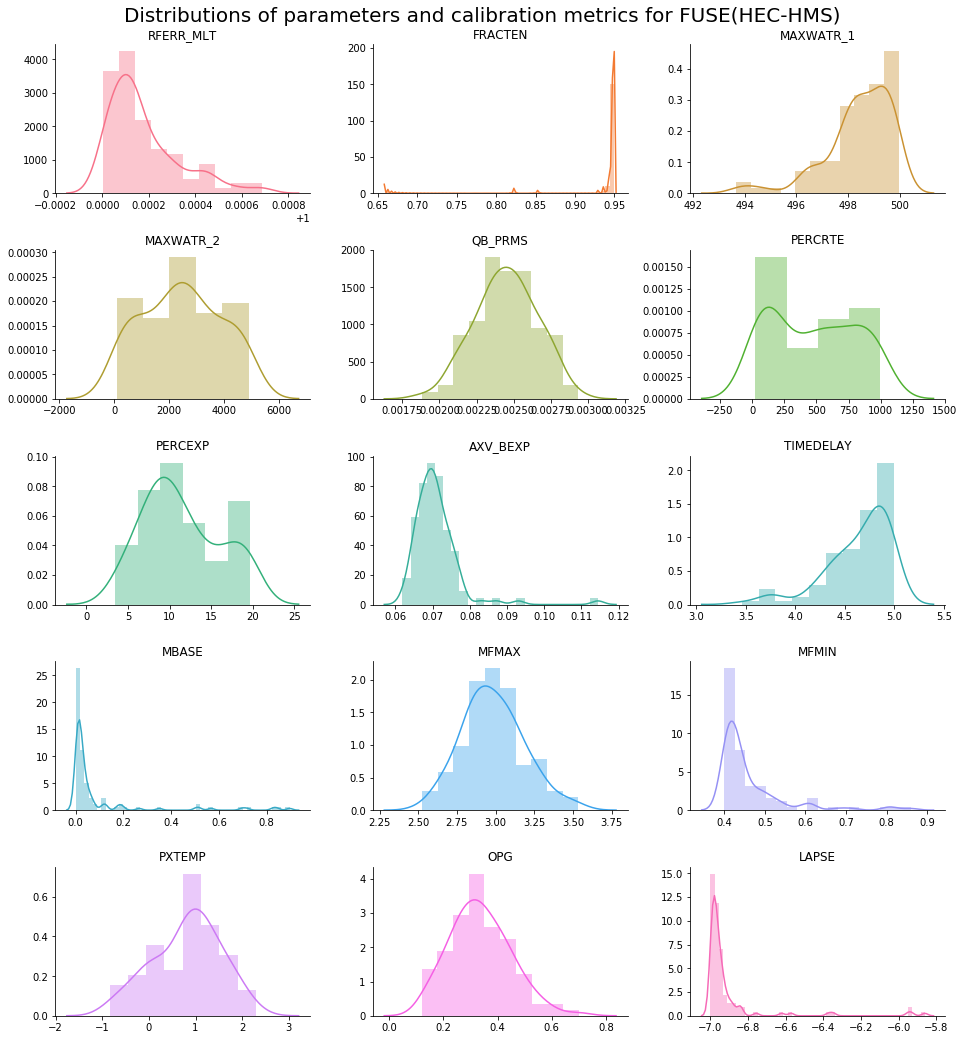

In [7]:
pardat = parExtract(hechmsparam, hechmsparlist) 
parstat= pardat.describe() #Descriptive statistics
parstat.to_csv('output/hechmsstats_trunc.csv') 

pardat = pd.melt(pardat)  #tidy
print(parstat)

#Plot
g = sns.FacetGrid(pardat, col="variable", col_order=hechmsparlist, hue='variable', col_wrap=3, sharey = False, sharex=False)
g = (g.map(sns.distplot, 'value').set_ylabels('').set_xlabels(''))

for ax, parname, in zip(g.axes.flat, hechmsparlist):
    ax.set_title(parname)
    
g = g.fig.suptitle('Distributions of parameters and calibration metrics for FUSE(HEC-HMS)', 
                   x=0.75, y=0.96, horizontalalignment='center', verticalalignment='top', fontsize = 20)
plt.tight_layout(rect=[0, 0, 1.5, 0.95])
plt.show()

# FUSE (VIC)

        RFERR_MLT     FRACTEN   MAXWATR_1    MAXWATR_2     BASERTE  \
count  100.000000  100.000000  100.000000   100.000000  100.000000   
mean     1.000460    0.103215  447.352539  4739.855957   52.571911   
std      0.000213    0.067334   47.014992   273.894562   39.055401   
min      1.000052    0.050175  322.602661  3746.879150    2.045619   
25%      1.000301    0.057100  419.414490  4653.667847   30.404607   
50%      1.000451    0.073926  458.228104  4830.930176   45.986496   
75%      1.000628    0.126213  487.311470  4947.027588   63.373240   
max      1.000924    0.363979  499.378784  4999.716797  276.761414   

          QB_POWR     RTFRAC1     PERCRTE     PERCEXP    AXV_BEXP   TIMEDELAY  \
count  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
mean     5.877296    0.915287  347.635284    6.793250    0.259603    4.454615   
std      1.669015    0.123027  325.204224    3.564768    0.066566    0.463750   
min      2.207247    0.141259    6.016535    

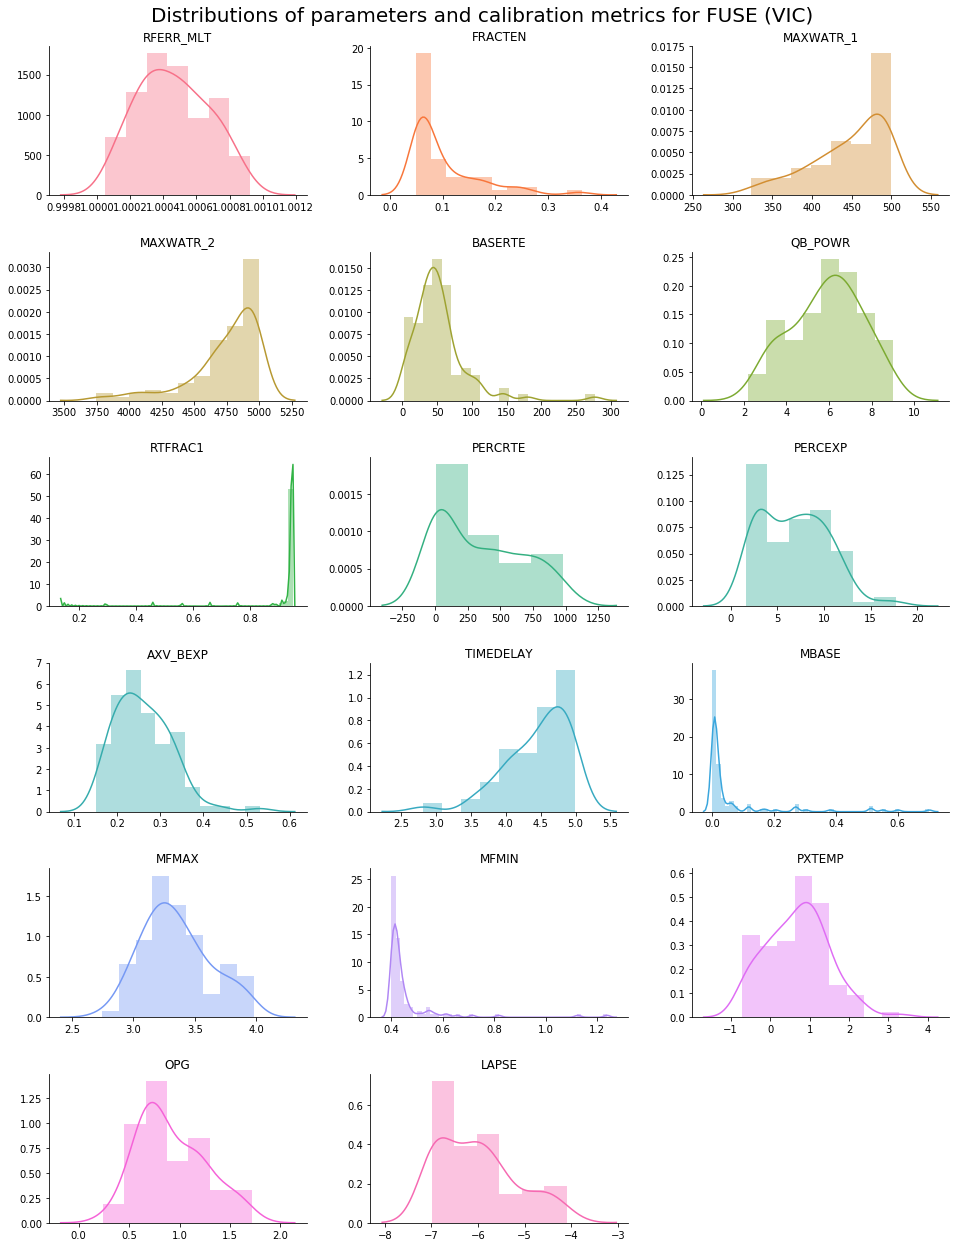

In [8]:
pardat = parExtract(vicparam, vicparlist) 
parstat= pardat.describe() #Descriptive statistics
parstat.to_csv('output/vicstats_trunc.csv') 

pardat = pd.melt(pardat)  #tidy
print(parstat)

#Plot
g = sns.FacetGrid(pardat, col="variable", col_order=vicparlist, hue='variable', col_wrap=3, sharey = False, sharex=False)
g = (g.map(sns.distplot, 'value').set_ylabels('').set_xlabels(''))

for ax, parname, in zip(g.axes.flat, vicparlist):
    ax.set_title(parname)
    
g = g.fig.suptitle('Distributions of parameters and calibration metrics for FUSE (VIC)', 
                   x=0.75, y=0.96, horizontalalignment='center', verticalalignment='top', fontsize = 20)
plt.tight_layout(rect=[0, 0, 1.5, 0.95])
plt.show()

# FUSE(SAC-SMA)

        RFERR_MLT     FRACTEN   MAXWATR_1    PERCFRAC     FPRIMQB  \
count  100.000000  100.000000  100.000000  100.000000  100.000000   
mean     1.000488    0.385240  425.096375    0.466070    0.495687   
std      0.000293    0.137044   74.376854    0.210296    0.187806   
min      1.000009    0.103487  231.126343    0.050884    0.145921   
25%      1.000256    0.291565  362.855408    0.331790    0.346810   
50%      1.000490    0.363481  458.613068    0.487474    0.479858   
75%      1.000720    0.452456  487.828033    0.637143    0.637334   
max      1.000999    0.682788  499.402130    0.810187    0.838495   

         MAXWATR_2   QBRATE_2A   QBRATE_2B     SACPMLT     SACPEXP  \
count   100.000000  100.000000  100.000000  100.000000  100.000000   
mean   2888.958496    0.002071    0.002179  215.601776    3.552872   
std     959.145020    0.000992    0.000877   38.044830    1.087569   
min    1346.805054    0.001002    0.001045   71.943909    1.011125   
25%    2061.719299    0.0015

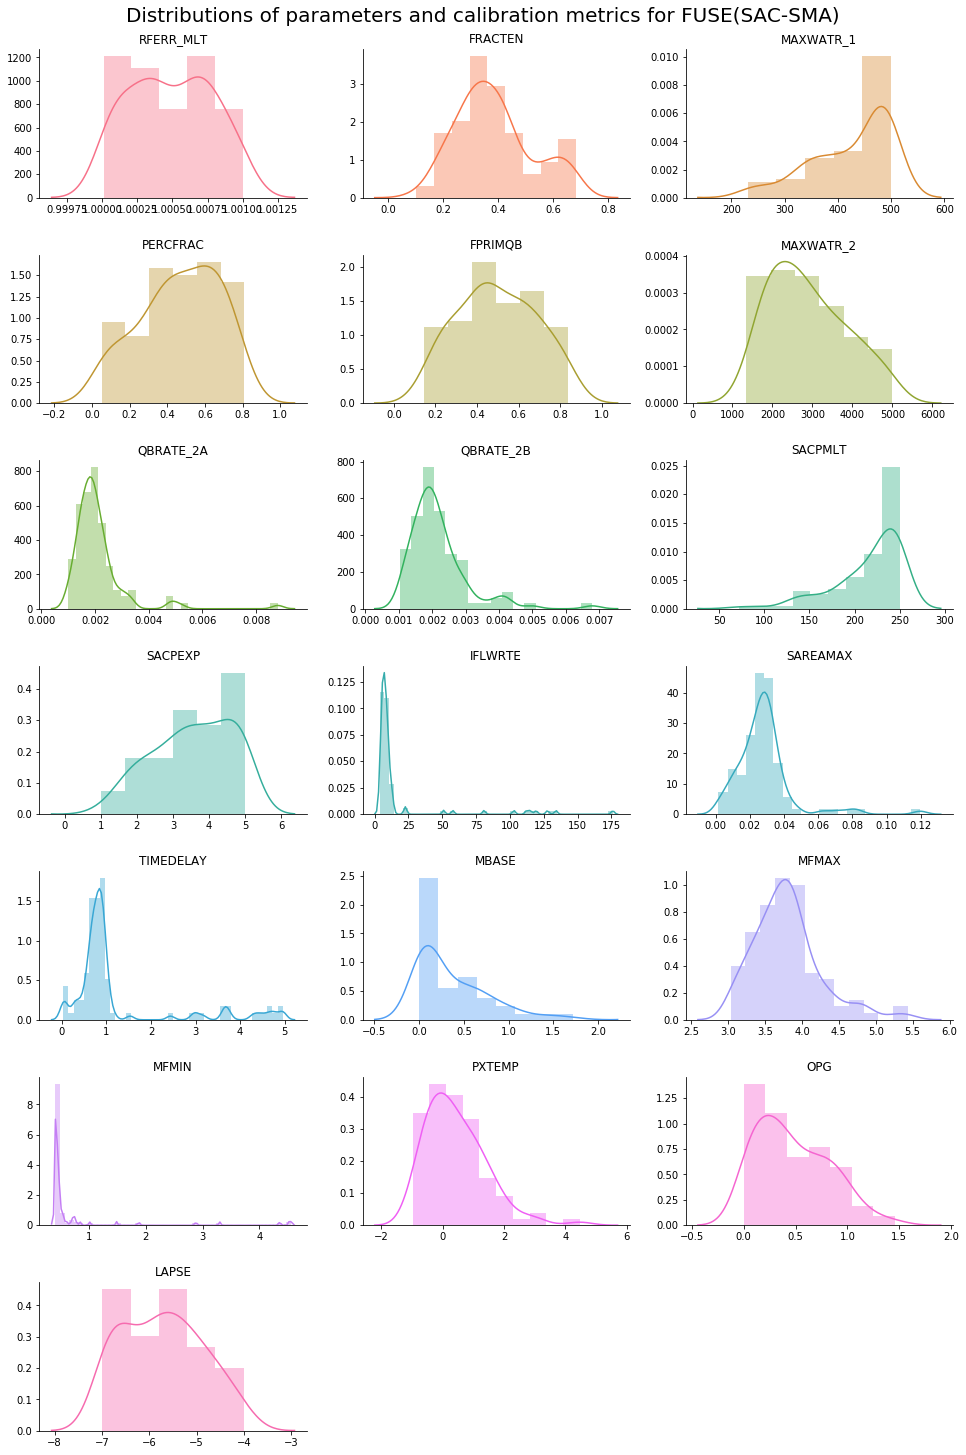

In [9]:
pardat = parExtract(sacsmaparam, sacsmaparlist) 
parstat= pardat.describe() #Descriptive statistics
parstat.to_csv('output/sacsmastats_trunc.csv') 

pardat = pd.melt(pardat)  #tidy
print(parstat)

#Plot
g = sns.FacetGrid(pardat, col="variable", col_order=sacsmaparlist, hue='variable', col_wrap=3, sharey = False, sharex=False)
g = (g.map(sns.distplot, 'value').set_ylabels('').set_xlabels(''))

for ax, parname, in zip(g.axes.flat, sacsmaparlist):
    ax.set_title(parname)
    
g = g.fig.suptitle('Distributions of parameters and calibration metrics for FUSE(SAC-SMA)', 
                   x=0.75, y=0.96, horizontalalignment='center', verticalalignment='top', fontsize = 20)
plt.tight_layout(rect=[0, 0, 1.5, 0.95])
plt.show()

# Plots of all fields in the parameter file (For further diagnosis)

# FUSE(PRMS)

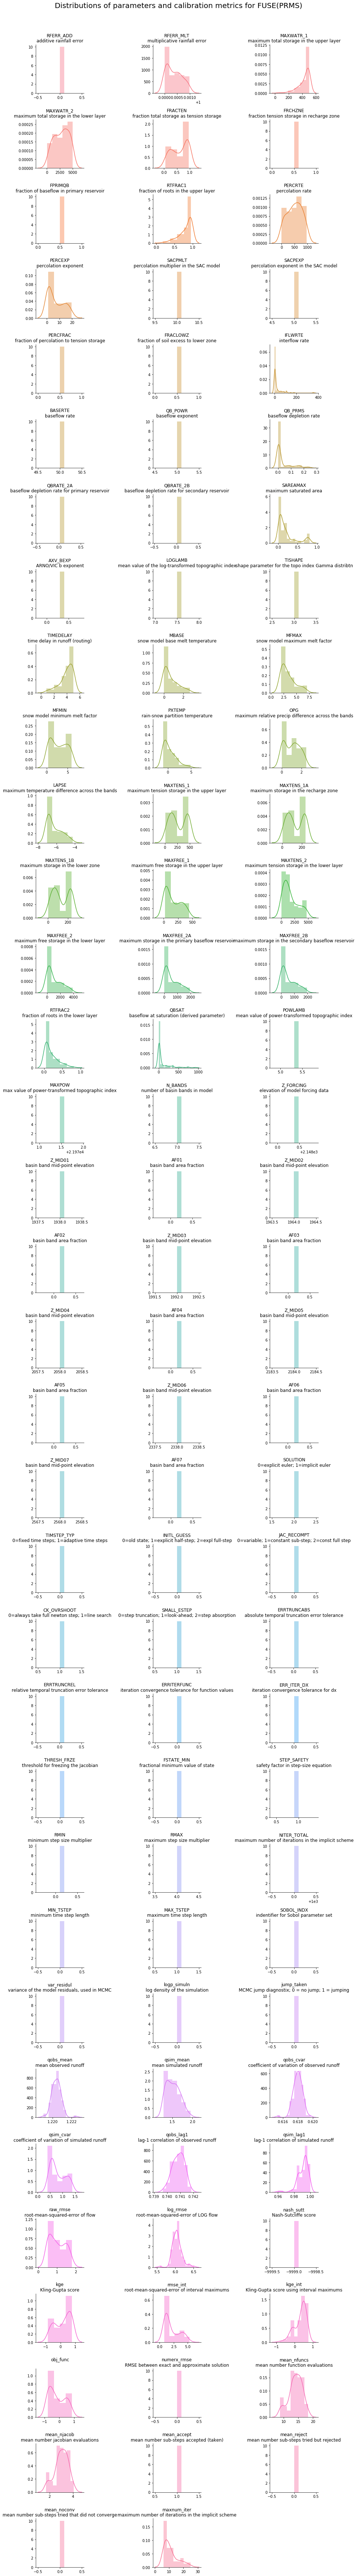

In [12]:
pardat = parExtract(prmsparam, parlist) 
parstat=pardat.describe() #Descriptive statistics
parstat.to_csv('output/prmsstats.csv')

pardat = pd.melt(pardat)  #tidy

# PLOT
g = sns.FacetGrid(pardat, col="variable", col_order=parlist, hue='variable', col_wrap=3, sharey = False, sharex=False)
g = (g.map(sns.distplot, 'value').set_ylabels('').set_xlabels(''))

for ax, parname, pardesc, in zip(g.axes.flat, parlist, pardesclist):
    ax.set_title(parname + "\n" +pardesc)
    
g = g.fig.suptitle('Distributions of parameters and calibration metrics for FUSE(PRMS)', 
                   x=0.75, y=0.96, horizontalalignment='center', verticalalignment='top', fontsize = 20)
plt.tight_layout(rect=[0, 0, 1.5, 0.95])
plt.show()

# FUSE (HEC-HMS)

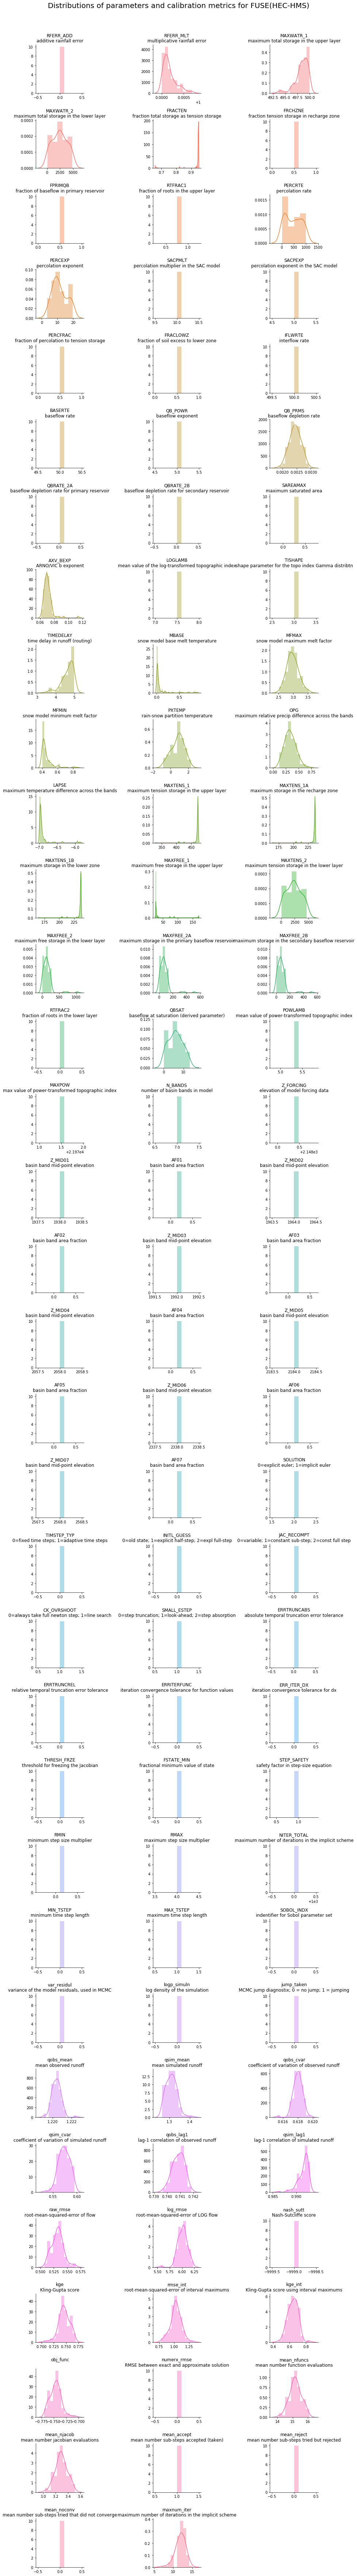

In [13]:
pardat = parExtract(hechmsparam, parlist) 
parstat=pardat.describe() #Descriptive statistics
parstat.to_csv('output/hechmsstats.csv')

pardat = pd.melt(pardat)  

g = sns.FacetGrid(pardat, col="variable", col_order=parlist, hue='variable', col_wrap=3, sharey = False, sharex=False)
g = (g.map(sns.distplot, 'value').set_ylabels('').set_xlabels(''))

for ax, parname, pardesc, in zip(g.axes.flat, parlist, pardesclist):
    ax.set_title(parname + "\n" +pardesc)
    
g = g.fig.suptitle('Distributions of parameters and calibration metrics for FUSE(HEC-HMS)', 
                   x=0.75, y=0.96, horizontalalignment='center', verticalalignment='top', fontsize = 20)
plt.tight_layout(rect=[0, 0, 1.5, 0.95])
plt.show()

# FUSE (VIC)

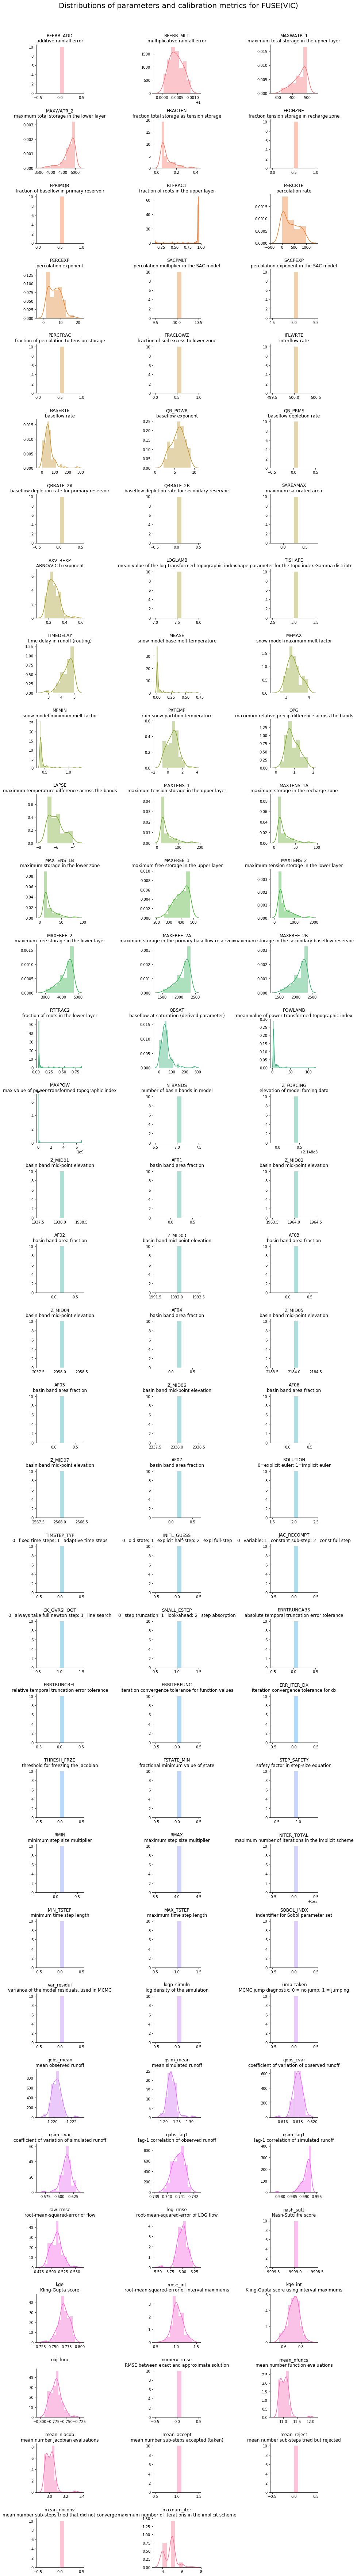

In [14]:
pardat = parExtract(vicparam, parlist) 
parstat=pardat.describe() #Descriptive statistics
parstat.to_csv('output/vicstats.csv')

pardat = pd.melt(pardat)  #tidy

g = sns.FacetGrid(pardat, col="variable", col_order=parlist, hue='variable', col_wrap=3, sharey = False, sharex=False)
g = (g.map(sns.distplot, 'value').set_ylabels('').set_xlabels(''))

for ax, parname, pardesc, in zip(g.axes.flat, parlist, pardesclist):
    ax.set_title(parname + "\n" +pardesc)
    
g = g.fig.suptitle('Distributions of parameters and calibration metrics for FUSE(VIC)', 
                   x=0.75, y=0.96, horizontalalignment='center', verticalalignment='top', fontsize = 20)
plt.tight_layout(rect=[0, 0, 1.5, 0.95])
plt.show()

# FUSE (SAC-SMA)

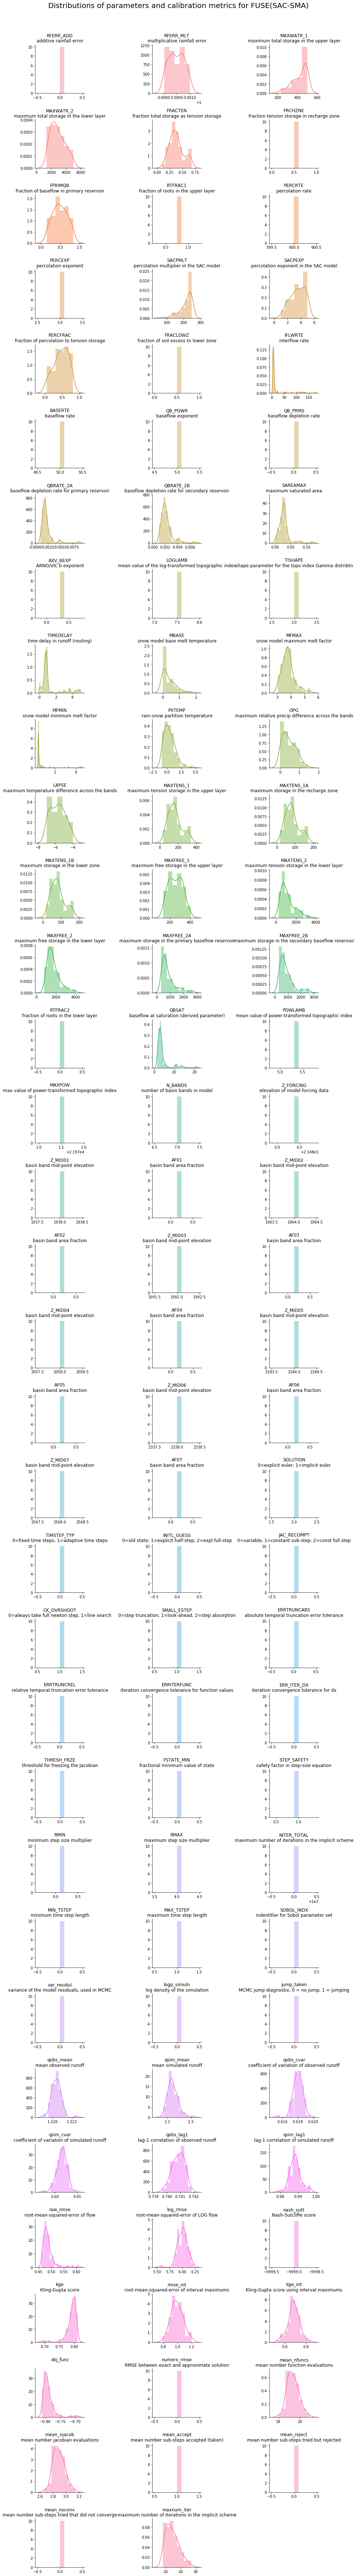

In [15]:
pardat = parExtract(sacsmaparam, parlist) 
parstat=pardat.describe() #Descriptive statistics
parstat.to_csv('output/sacsmastats.csv')

pardat = pd.melt(pardat)  #tidy

g = sns.FacetGrid(pardat, col="variable", col_order=parlist, hue='variable', col_wrap=3, sharey = False, sharex=False)
g = (g.map(sns.distplot, 'value').set_ylabels('').set_xlabels(''))

for ax, parname, pardesc, in zip(g.axes.flat, parlist, pardesclist):
    ax.set_title(parname + "\n" +pardesc)
    
g = g.fig.suptitle('Distributions of parameters and calibration metrics for FUSE(SAC-SMA)', 
                   x=0.75, y=0.96, horizontalalignment='center', verticalalignment='top', fontsize = 20)
plt.tight_layout(rect=[0, 0, 1.5, 0.95])
plt.show()